Exercise 1




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
df = pd.read_csv(r'train.tsv', sep='\t')


In [11]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [14]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None


In [66]:
# Counting the number of sentiments for each numbering
sentiment_counts = df['Sentiment'].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)


Sentiment Counts:
Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64


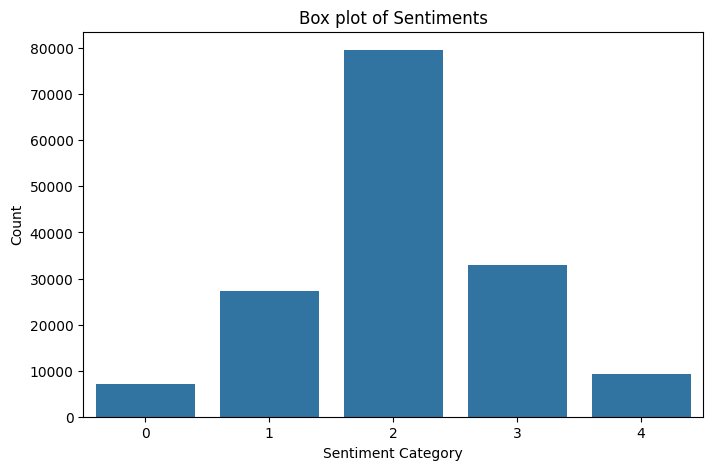

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.title("Box plot of Sentiments")
plt.show()

In [19]:
def preprocessing_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower().strip()
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [20]:
df['PreProcessed_Phrase'] = df['Phrase'].apply(preprocessing_text)

In [22]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(df['PreProcessed_Phrase'])
y = df['Sentiment']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.3, random_state=42)

In [24]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy (CountVectorizer): {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Naive Bayes Model Accuracy (CountVectorizer): 0.6079
              precision    recall  f1-score   support

           0       0.46      0.28      0.34      2113
           1       0.49      0.42      0.46      8228
           2       0.68      0.79      0.73     23588
           3       0.52      0.50      0.51     10041
           4       0.48      0.28      0.36      2848

    accuracy                           0.61     46818
   macro avg       0.53      0.45      0.48     46818
weighted avg       0.59      0.61      0.60     46818



In [27]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['PreProcessed_Phrase'])

In [28]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [29]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

In [30]:
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Naive Bayes Model Accuracy (TF-IDF): {accuracy_tfidf:.4f}")
print(classification_report(y_test, y_pred_tfidf))

Naive Bayes Model Accuracy (TF-IDF): 0.5853
              precision    recall  f1-score   support

           0       0.59      0.04      0.08      2113
           1       0.52      0.27      0.35      8228
           2       0.61      0.89      0.72     23588
           3       0.53      0.40      0.45     10041
           4       0.64      0.05      0.10      2848

    accuracy                           0.59     46818
   macro avg       0.58      0.33      0.34     46818
weighted avg       0.57      0.59      0.53     46818



Exercise 2

In [33]:
!pip install ibm-watson


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.8/342.8 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.8 MB/s eta 0:00:00
  Created wheel for ibm-watson: filename=ibm_watson-9.0.0-py3-none-any.whl size=345042 sha256=7ef283963397b576767a6e80cd61f32c1795c30bf5df669c45549cdfd00239d1
  Stored in directory: /root/.cache/pip/wheels/a1/ed/65/5abe3aa86c063331a8064910b7722d22ddf0bd75fc322f6c48
Successfully built ibm-watson


In [65]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator


api_key = "T2ukipmwTaXWCYboXtftPVJySV32K_Z-fSQ4mug6UcuM"
service_url = "https://api.us-east.natural-language-understanding.watson.cloud.ibm.com/instances/b1ecbee6-6d6d-4d8e-b2ab-f6ce0486e6c0"

# Authenticating
authenticator = IAMAuthenticator(api_key)
nlu = NaturalLanguageUnderstandingV1(
    version="2021-08-01",
    authenticator=authenticator
)
nlu.set_service_url(service_url)


text = "The movie was not so interesting! The characters were not well developed and the story was boring."

# Analyzing sentiment
response = nlu.analyze(
    text=text,
    features=Features(sentiment=SentimentOptions()),
    language="en"
).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 98,
    "features": 1
  },
  "sentiment": {
    "document": {
      "score": -0.958719,
      "label": "negative"
    }
  },
  "language": "en"
}


Exercise 3


In [31]:
!pip install transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 859.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [55]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis",model="distilbert-base-uncased-finetuned-sst-2-english")

# Washington Post excerpt
text = """Claudine Gay resigned Tuesday as Harvard’s president after weeks of controversy
initially sparked by her testimony at a congressional hearing on antisemitism, and later
focusing on allegations of plagiarism in work she had produced throughout her academic career.
(Gay’s resignation was first reported by the Harvard Crimson.) Plagiarism is a particularly
serious charge in academia: In 2021, the president of the University of South Carolina, Lt. Gen.
Robert L. Caslen Jr., resigned after admitting that he had plagiarized a commencement speech.
Plagiarism includes a broad range of possible offenses, from improperly placing a citation to
claiming credit for another scholar’s research or insight, and individual institutions develop their
own policies for evaluating and responding to allegations of research misconduct. Gay defended
her academic record in an op-ed published Wednesday in the New York Times, saying that she
addressed attribution issues promptly after learning about them, and that “I have never
misrepresented my research findings, nor have I ever claimed credit for the research of others.
Moreover, the citation errors should not obscure a fundamental truth: I proudly stand by my
work and its impact on the field.”
"""

# Run sentiment analysis
result = sentiment_pipeline(text)

# Display the result
print(result)


Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.8526305556297302}]


In [57]:
text1="""I am extremely disappointed with this service. Not worth the money"""

In [59]:
# Run sentiment analysis
result = sentiment_pipeline(text1)

# Display the result
print(result)

[{'label': 'NEGATIVE', 'score': 0.999816358089447}]


In [58]:
# Running sentiment analysis
sentiment_pipeline1 = pipeline("sentiment-analysis",model="nlptown/bert-base-multilingual-uncased-sentiment")
result = sentiment_pipeline1(text1)
print(result)

Device set to use cpu


[{'label': '1 star', 'score': 0.6999939680099487}]
